
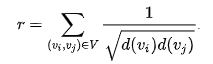 

In [82]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

In [111]:
vyb = Chem.SDMolSupplier('sets/bzr_3d.sd')

ms = [x for x in vyb if x is not None]
len(ms)

405

In [112]:
def clean_mark(mark, n) :
    
    for i in range(n) :
        mark[i] = 0

In [113]:
def wave(a, ii, n, mark) :
    
    f = 1
    
    mark_num = 1

    # поджог
    mark[ii] = mark_num

    # пока не подожжем все вершины
    while 1 :
        if f == 0 :
            break

        f = 0

        for i in range (n) :
            if mark[i] == mark_num :
                for j in range (n) :
                    if a[i][j] == 1 and mark[j] == 0 :
                        mark[j] = mark_num + 1
    
        for i in range (n) :
            if mark[i] == 0 :
                f = 1

        mark_num = mark_num + 1

In [114]:
def calc_Randich_index(d, deg, n) :
  
    sum = 0

    for i in range(n) :
        for j in range(n) :
            if d[i][j] == 1 :
                sum += 1 / np.sqrt(deg[i] * deg[j])
                
    return (sum / 2)

In [115]:
def init_distance_table_i(d, mark, i, n) :

    for j in range(n) :
        d[i][j] = mark[j] - 1

In [116]:
def init_distance_table(a, d, mark, n) :

    for i in range(n) :
        # очистить метки
        clean_mark(mark, n)

        # волна со стартовым атомом i
        wave(a, i, n, mark)

        # заполнить i-тую строку матрицы расстояний
        init_distance_table_i(d, mark, i, n)

In [117]:
def init_deg_array (a, deg, n) :
    
    for i in range(n) :
        sum = 0
        for j in range(n) :
            if a[i][j] == 1 :
                sum += 1
        deg[i] = sum

In [118]:
Randich_indices = np.zeros(len(ms), dtype = float, order = 'C')

for i in range(len(ms)) :
    n = ms[i].GetNumAtoms()
    a = Chem.rdmolops.GetAdjacencyMatrix(ms[i], useBO=False, emptyVal=0, force=False, prefix='')
     
    d = np.zeros((n, n), dtype=int, order='C')

    mark = np.zeros(n, dtype=int, order='C')
    deg = np.zeros(n, dtype=int, order='C')

    init_distance_table(a, d, mark, n)
    init_deg_array (a, deg, n)
    Randich_indices[i] = calc_Randich_index(d, deg, n)

    print (Randich_indices[i])

9.237183443017882
9.664703797946451
9.647867045540842
10.07538740046941
9.237183443017882
9.664703797946451
9.647867045540842
10.058550648063802
10.48607100299237
9.647867045540842
10.058550648063802
10.058550648063802
10.48607100299237
10.48607100299237
10.07538740046941
10.44850830842307
10.685871848001625
10.147867045540842
10.558550648063802
10.98607100299237
10.558550648063802
10.98607100299237
11.769875513468987
10.613392202930195
9.237183443017884
9.66470379794645
10.07538740046941
9.647867045540842
10.631030293135236
12.007239053047547
10.202708600407234
10.202708600407234
10.613392202930195
9.775188245478667
9.775188245478667
9.775188245478667
10.558550648063802
11.391883981397134
8.843336592900531
9.254020195423491
9.664703797946451
9.681540550352057
9.681540550352057
9.25402019542349
10.092224152875017
10.058550648063802
9.647867045540842
10.092224152875017
10.486071002992368
10.092224152875017
10.075387400469408
10.075387400469408
9.647867045540844
9.647867045540844
10.4860

In [119]:
np.savetxt('bzr-Randich_indices.csv', [p for p in zip(Randich_indices)], delimiter=',', fmt='%.3f')

In [81]:
# проверка для конкретных молекул

m = Chem.MolFromMolFile('2.mol')

n = m.GetNumAtoms()
a = Chem.rdmolops.GetAdjacencyMatrix(m, useBO=False, emptyVal=0, force=False, prefix='')

d = np.zeros((n, n), dtype=int, order='C')

mark = np.zeros(n, dtype=int, order='C')
deg = np.zeros(n, dtype=int, order='C')

init_distance_table(a, d, mark, n)
print (d, '\n')
init_deg_array (a, deg, n)
print (deg, '\n')
r = calc_Randich_index(d, deg, n)

print (r)

[[0 1 2 3 4 5]
 [1 0 1 2 3 4]
 [2 1 0 1 2 3]
 [3 2 1 0 1 2]
 [4 3 2 1 0 1]
 [5 4 3 2 1 0]] 

[1 2 2 2 2 1] 

2.914213562373095
